In [2]:
import json
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import pickle
import numpy as np
import shutil
#import cv2

/tmp/ipykernel_205535/2043338920.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Config Directories

In [4]:
#BDD Annotation
vgRoot = 'VisualGenome/'

vgAttr = vgRoot+'Annotation/attributes.json'
vgObj = vgRoot+'Annotation/objects.json'
vgSG = vgRoot+'Annotation/scene_graphs.json'

vgExAttr = 'ExtractAttribute'
vgExRel = 'ExtractRelation'
vgGT = 'ExtractGT'
vgImg = 'VG_100K'

In [8]:
fVG = open(vgSG)
dataSG = json.load(fVG)
len(dataSG)

108077

In [132]:
objects_list_partial = [
    "railcar", "trafficlight", "street", "city employee", "passenger window", "road indicator", "cross walk sign",
    "traffic post", "street intersection", "bus that is white", "traffic cones", "street name", "traffic camera",
    "street lights", "traffic meter", "stop sign", "traffic light", "roads", "stop lights", "car door",
    "pedestrian sign", "bike racks", "construction sign", "pedestrian crossing", "railroad crossing", "railway track",
    "police car", "traffic signals", "bus", "road signs", "crosswalk", "bike", "pedestrian walk", "train tracks",
    "rail line", "street camera", "railng", "traffic indicators", "crosswalk signal", "street divider", "railtrack",
    "road barrier", "street light", "lane", "traffic line", "crosswalks", "handicap sign", "traffic lilght",
    "railroad track", "street post", "street side", "sidewalk grate", "street marker", "bus sign", "cross walk light",
    "traffic post", "road sign", "no right turn", "street lamp is green", "street pavement", "no stopping anytime",
    "speed limit", "metro sign", "rail crossing", "bus platform", "pedestrian light", "traffic cones", "railway",
    "convertible", "electric sign", "emergency vehicle", "pedestrian", "railroad track", "sidewalk", "street name sign",
    "train signal", "bus depot", "construction vehicle", "railroad track", "train station", "pedstrian", "railroad",
    "stop sign", "traffic meter", "railtrack", "street camera", "train platform", "crosswalk", "lane", "traffic light",
    "traffic meter", "stop lights", "train tracks", "bike path", "construction crane", "metro line", "parking meter",
    "street lights", "street name", "traffic camera", "bus stop", "car train", "pedestrian crossing", "rail crossing",
    "rail line", "street divider", "traffic light", "crosswalk signal", "railway track", "street light", "traffic sign",
    "bike lane", "construction sign", "pedestrian walk", "railroad crossing", "street sign", "traffic cone", "bike rack",
    "bus lane", "crosswalk light", "railroad sign", "roadwork sign", "stoplight", "traffic barrier", "pedestrian lane",
    "railway crossing", "speed bump", "street crossing", "traffic island", "bicycle stand", "car parking", "no parking sign",
    "parking garage", "pedestrian bridge", "road block", "sidewalk curb", "traffic circle", "bike trail", "crossing guard",
    "parking lot", "road sign", "street lamp", "taxicab", "traffic light", "bike lane", "bus stop", "parking space",
    "pedestrian path", "road barrier", "speed limit sign", "traffic signal", "zebra crossing", "carpool lane", "footpath",
    "motorcycle parking", "parking sign", "roadway", "traffic cone", "bicycle path", "crosswalk", "parking meter",
    "pedestrian zone", "roundabout", "street light", "traffic barrier", "bus zone", "cycle lane", "handicap parking",
    "no entry sign", "parking bay", "road marking", "traffic sign", "walkway", "bicycle lane", "car park", "driveway",
    "motorway", "park and ride", "pedestrian signal", "rail crossing", "street", "traffic cone", "vehicle lane",
    "zebra crossing", "alleyway", "bypass", "cul-de-sac", "footbridge", "junction", "pedestrian overpass", "roadside",
    "stop sign", "traffic island", "bicycle crossing"
]

In [225]:
sysnObj = open(vgRoot + 'Annotation/object_synsets.json')
objects_sysn = json.load(sysnObj)
len(objects_sysn)

40154

In [60]:
sysnRel = open(vgRoot + 'Annotation/relationship_synsets.json')
rel_sysn = json.load(sysnRel)
len(rel_sysn)

13536

In [61]:
sysnAttr = open(vgRoot + 'Annotation/attribute_synsets.json')
attr_sysn = json.load(sysnAttr)
len(attr_sysn)

18720

In [226]:
lsSysn = []
for item in objects_sysn.keys():
    lsSysn.append(objects_sysn[item])
    # break

print(len(lsSysn))
lsSysn = list(set(lsSysn))
print(len(lsSysn))

# open file in write mode
with open(vgRoot + 'Annotation/' +'sysn_obj.txt', 'w') as fp:
    for item in lsSysn:
        # write each item on a new line
        fp.write("%s\n" % item.strip())
    print('Done')

40154
5772
Done


In [55]:
# Using readlines()
objectNormTraffic = []
file1 = open(vgRoot+'Annotation/objectTraffic.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    objectNormTraffic.append(line.strip().lower().replace('\n',''))

print(len(objectNormTraffic))
objectNormTraffic = objectNormTraffic[:]
len(objectNormTraffic)

objectNorm  = [ 'airplane', 'animal', 'arm', 'bag', 'banana', 'basket', 'beach', 'bear', 'bed', 'bench', 'bike',
                'bird', 'board', 'boat', 'book', 'boot', 'bottle', 'bowl', 'box', 'boy', 'branch', 'building',
                'bus', 'cabinet', 'cap', 'car', 'cat', 'chair', 'child', 'clock', 'coat', 'counter', 'cow', 'cup',
                'curtain', 'desk', 'dog', 'door', 'drawer', 'ear', 'elephant', 'engine', 'eye', 'face', 'fence',
                'finger', 'flag', 'flower', 'food', 'fork', 'fruit', 'giraffe', 'girl', 'glass', 'glove', 'guy',
                'hair', 'hand', 'handle', 'hat', 'head', 'helmet', 'hill', 'horse', 'house', 'jacket', 'jean',
                'kid', 'kite', 'lady', 'lamp', 'laptop', 'leaf', 'leg', 'letter', 'light', 'logo', 'man', 'men',
                'motorcycle', 'mountain', 'mouth', 'neck', 'nose', 'number', 'orange', 'pant', 'paper', 'paw',
                'people', 'person', 'phone', 'pillow', 'pizza', 'plane', 'plant', 'plate', 'player', 'pole', 'post',
                'pot', 'racket', 'railing', 'rock', 'roof', 'room', 'screen', 'seat', 'sheep', 'shelf', 'shirt',
                'shoe', 'short', 'sidewalk', 'sign', 'sink', 'skateboard', 'ski', 'skier', 'sneaker', 'snow',
                'sock', 'stand', 'street', 'surfboard', 'table', 'tail', 'tie', 'tile', 'tire', 'toilet', 'towel',
                'tower', 'track', 'train', 'tree', 'truck', 'trunk', 'umbrella', 'vase', 'vegetable', 'vehicle',
                'wave', 'wheel', 'window', 'windshield', 'wing', 'wire', 'woman', 'zebra']

len(objectNorm)


170


150

In [10]:
objectNew = []
error = []
for item in dataSG:
    for x in item['objects']:
        try:
            if(x['synsets'][0].split('.')[0] in objectNorm):
                objectNew.append(item['image_id'])
                break
        except:
            error.append(item['image_id'])
    #break
print(len(objectNew))
objectNew = list(set(objectNew))
print(len(objectNew))

27102
27102


In [11]:
print(len(error))
error = list(set(error))
print(len(error))

789416
66487


In [63]:
def get_bbox_attr(object_id, objectList):
    bboxObj = None
    nameObj = None
    attr = None
    status = True
    for item in objectList:
        if item['object_id'] == object_id:
            if(len(item['synsets']) == 0):
                status = False
                break
            else:
                bboxObj = [item['x'], item['y'], item['w'], item['h']]
                nameObj = item['synsets'][0].split('.')[0].replace('_','')
                if 'attributes' in item.keys():
                    attr = item['attributes']
                else:
                    attr = ['none', 'none']
                break
    return bboxObj, nameObj, attr, status

def get_attr_id(attr, att_cls_id):
    att_id = []
    for item in attr:
        att_id.append(att_cls_id.index(item))
    
    # if(len(att_id)>=2):
    #     att_id = att_id[:2]
    # else:
    #     att_id.append(att_cls_id.index('n/a'))
    return att_id

def get_attr_sysn(attr, att_sysn):
    att_id = []
    for item in attr:
        try:
            att_id.append(att_sysn[item])
        except:
            att_id.append(att_sysn["none"])
    
    if(len(att_id)>=2):
        att_id = att_id[:2]
    else:
        att_id.append(att_sysn["none"])
    return att_id

def valid_string(st):
    if(any(i.isdigit() for i in st)):
        return True
    for char in st:
        if not char.isalpha():  # Kiểm tra nếu có ký tự không phải là chữ cái
            return True 
    for item in st.split(" "):
        if(len(item) <= 2):
            return True
    if(len(st.split(" "))>=3):
        return True

#print(valid_string( 'no parking sign'))

In [81]:
checkRel = [
        "",
        "above",
        "across",
        "against",
        "along",
        "and",
        "at",
        "attached to",
        "behind",
        "belonging to",
        "between",
        "carrying",
        "covered in",
        "covering",
        "eating",
        "flying in",
        "for",
        "from",
        "growing on",
        "hanging from",
        "has",
        "holding",
        "in",
        "in front of",
        "laying on",
        "looking at",
        "lying on",
        "made of",
        "mounted on",
        "near",
        "of",
        "on",
        "on back of",
        "over",
        "painted on",
        "parked on",
        "part of",
        "playing",
        "riding",
        "says",
        "sitting on",
        "standing on",
        "to",
        "under",
        "using",
        "walking in",
        "walking on",
        "watching",
        "wearing",
        "wears",
        "with"
    ]
print(len(checkRel))

51


In [173]:
# Using readlines()
file1 = open(vgRoot + 'Annotation/' +'object_cls.txt', 'r')
Lines = file1.readlines()
obj_cls = []
# Strips the newline character
for line in Lines:
    obj_cls.append(line.replace('\n', ''))

len(obj_cls)

32

In [149]:
# Using readlines()
file1 = open(vgRoot + 'Annotation/' +'att_cls.txt', 'r')
Lines = file1.readlines()
att_cls = []
# Strips the newline character
for line in Lines:
    att_cls.append(line.replace('\n', ''))

len(att_cls)

5455

In [28]:
c = []
for item in dataSG[:]:
    if(len(item['relationships']) >= 5):
        c.append(item['image_id'])
print(len(c))
c = list(set(c))
print(len(c))

98629
98629


In [ ]:
def create_anno(lsRel):
    return

In [118]:
checkIsValid = []
checkObject = []
for item in dataSG[:]:
    #if((len(item['relationships']) >= 5)):
    objectGT = []
    objectObj = item['objects']
    for x in item['relationships']:
        bboxSub, nameSub, attrSub, statusSub = get_bbox_attr(x['subject_id'], objectObj)
        bboxObj, nameObj, attrObj, statusObj = get_bbox_attr(x['object_id'], objectObj)
        if(statusSub == True and statusObj == True):
            if((nameSub in objectNorm and nameObj in objectNorm) or (nameSub in objectNormTraffic and nameObj in objectNormTraffic)):
                if(x['predicate'].lower() in checkRel):
                    checkIsValid.append(item['image_id'])
                    gtDict = {
                            'rel': x['predicate'].lower(),

                            'bbox_sub': bboxSub,
                            'bbox_obj': bboxObj,

                            'attr_sub': get_attr_sysn(attrSub, att_sysn=attr_sysn),
                            'attr_obj': get_attr_sysn(attrObj, att_sysn=attr_sysn),

                            'cls_sub': nameSub,
                            'cls_obj': nameObj,

                            'org_id_sub': x['subject_id'],
                            'org_id_obj': x['object_id'],
                        }
                    objectGT.append(gtDict)
                
        # break
    #checkObject.append(objectGT[:5])
    checkObject.append(objectGT)
    # with open(vgRoot + 'GTTraffic' +"/" + str(item['image_id'])+'.json', "w") as outfile:
    #     json.dump(objectGT, outfile)
    #break
print(len(checkIsValid))
checkIsValid = list(set(checkIsValid))
print(len(checkIsValid))

513672
77181


In [99]:
for item in checkIsValid:
    src = vgRoot+'VG_100K/' + str(item) + '.jpg'
    dst = vgRoot+'Image/' + str(item) + '.jpg'
    shutil.copy(src=src, dst=dst)

In [119]:
print(len(checkObject))
lenItem = []
objName = []
for item in checkObject[:]:
    lenItem.append(len(item))
    for x in item:
        objName.append(x['cls_sub'])
        objName.append(x['cls_obj'])

print(sum(lenItem) / len(lenItem) )
print(len(objName))
objName = list(set(objName))
print(len(objName))
D = {i+1: objName[i] for i in range(len(objName))}
D
with open(vgRoot + 'Annotation/' +'object_cls.json', "w") as outfile:
    json.dump(D, outfile)

108077
4.752833627876422
1027344
180


In [133]:
lsGT = os.listdir(vgRoot + 'GTTraffic')
lsIm = os.listdir(vgRoot + 'Image')
print(len(lsGT))
print(len(lsIm))
lsGT = [item.replace('.json', '') for item in lsGT ]
lsIm = [item.replace('.jpg', '') for item in lsIm ]
main_list = list(set(lsGT) - set(lsIm))


108077
77181


In [136]:
for item in main_list:
    os.remove(vgRoot + 'GTTraffic/' + item + '.json')

11


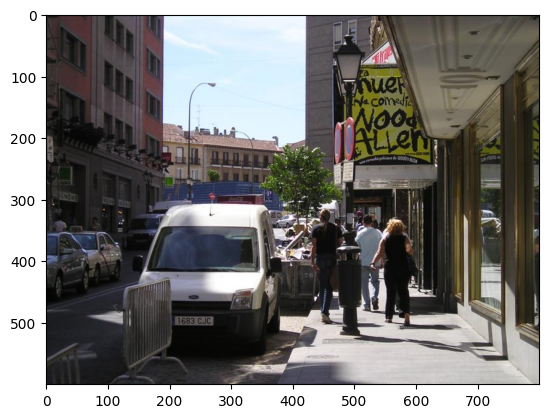

In [8]:
image_id = '356'
image = Image.open(vgRoot + 'Image/' + image_id + '.jpg')
plt.imshow(image)
f_anno = open(vgRoot + 'Train/anno/' + image_id + '.json')
anno = json.load(f_anno)
print(len(anno))

In [15]:
anno

[{'rel': 'on',
  'bbox_sub': [442, 313, 166, 167],
  'bbox_obj': [441, 488, 197, 100],
  'attr_sub': ['walk.v.01', 'stand.v.01'],
  'attr_obj': ['dirty.a.01', 'crowded.a.01'],
  'cls_sub': 'people',
  'cls_obj': 'sidewalk',
  'org_id_sub': 1058871,
  'org_id_obj': 1058872,
  'rel_id': 22,
  'id_sub': 16,
  'id_obj': 151,
  'attr_sub_id': [3582, 3664],
  'attr_obj_id': [810, 1911]},
 {'rel': 'near',
  'bbox_sub': [442, 313, 166, 167],
  'bbox_obj': [170, 319, 195, 203],
  'attr_sub': ['walk.v.01', 'stand.v.01'],
  'attr_obj': ['small.a.01', 'white.a.01'],
  'cls_sub': 'people',
  'cls_obj': 'car',
  'org_id_sub': 1058871,
  'org_id_obj': 1058873,
  'rel_id': 4,
  'id_sub': 16,
  'id_obj': 111,
  'attr_sub_id': [3582, 3664],
  'attr_obj_id': [3385, 14]},
 {'rel': 'near',
  'bbox_sub': [170, 319, 195, 203],
  'bbox_obj': [442, 313, 166, 167],
  'attr_sub': ['small.a.01', 'white.a.01'],
  'attr_obj': ['walk.v.01', 'stand.v.01'],
  'cls_sub': 'car',
  'cls_obj': 'people',
  'org_id_sub': 10

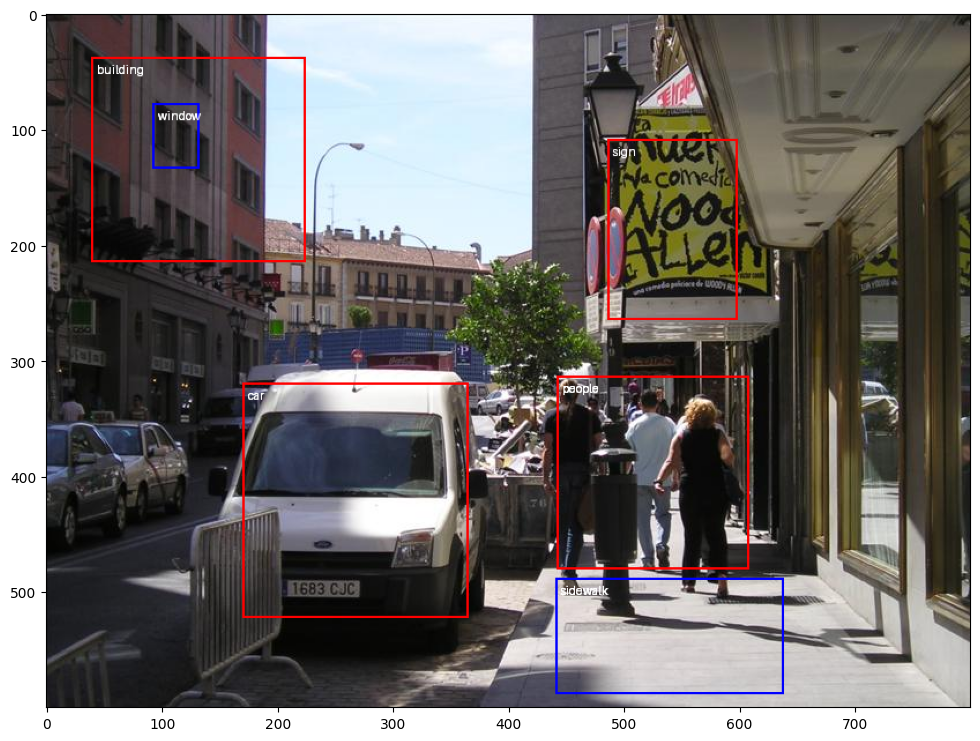

In [14]:
imCopy = image.copy()
imageDraw = ImageDraw.Draw(imCopy)
for item in anno:
    x_sub, y_sub, w_sub, h_sub = item['bbox_sub'][0],item['bbox_sub'][1],item['bbox_sub'][2],item['bbox_sub'][3]
    x_obj, y_obj, w_obj, h_obj = item['bbox_obj'][0],item['bbox_obj'][1],item['bbox_obj'][2],item['bbox_obj'][3]
    #print(x1, y1, x2, y2, item['names'][0])
    print()
    imageDraw.rectangle([(x_sub, y_sub), (w_sub + x_sub, h_sub + y_sub)], outline ="red", width=2) 
    imageDraw.rectangle([(x_obj, y_obj), (w_obj + x_obj, h_obj + y_obj)], outline ="blue", width=2) 
    imageDraw.text((x_sub+5, y_sub+5), item['cls_sub'], fill='white')
    imageDraw.text((x_obj+5, y_obj+5), item['cls_obj'], fill='white')
plt.figure(figsize=(16,9))
plt.imshow(imCopy)

In [155]:
attrName = []
for item in checkObject[:]:
    for x in item:
        listAtt = x['attr_obj'] + x['attr_sub']
        for at in listAtt:
            attrName.append(at)

print(len(attrName))
attrName = list(set(attrName))
print(len(attrName))

2054688
3700


In [156]:
relName = []
for item in checkObject[:]:
    for x in item:
        relName.append(x['rel'])

print(len(relName))
relName = list(set(relName))
print(len(relName))

513672
51


In [157]:
checkObject[-1]

[{'rel': 'on',
  'bbox_sub': [238, 233, 89, 54],
  'bbox_obj': [14, 110, 289, 193],
  'attr_sub': ['none.s.01', 'none.s.01'],
  'attr_obj': ['green.s.01', 'none.s.01'],
  'cls_sub': 'plate',
  'cls_obj': 'bus',
  'org_id_sub': 3786799,
  'org_id_obj': 3103225},
 {'rel': 'with',
  'bbox_sub': [14, 110, 289, 193],
  'bbox_obj': [98, 127, 50, 144],
  'attr_sub': ['green.s.01', 'none.s.01'],
  'attr_obj': ['none.s.01', 'none.s.01'],
  'cls_sub': 'bus',
  'cls_obj': 'door',
  'org_id_sub': 3103225,
  'org_id_obj': 2712437},
 {'rel': 'on',
  'bbox_sub': [100, 130, 50, 113],
  'bbox_obj': [29, 109, 225, 155],
  'attr_sub': ['none.s.01', 'none.s.01'],
  'attr_obj': ['green.s.01', 'none.s.01'],
  'cls_sub': 'door',
  'cls_obj': 'bus',
  'org_id_sub': 3561727,
  'org_id_obj': 3140197}]

In [158]:
# open file in write mode
with open(vgRoot + 'Annotation/' +'att_cls.txt', 'w') as fp:
    for item in attrName:
        # write each item on a new line
        fp.write("%s\n" % item.strip())
    print('Done')

Done


In [159]:
# open file in write mode
with open(vgRoot + 'Annotation/' +'object_cls.txt', 'w') as fp:
    for item in objName:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [160]:
# open file in write mode
with open(vgRoot + 'Annotation/' +'rel_cls.txt', 'w') as fp:
    for item in relName:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [162]:
# # Using readlines()
cls_obj = []
file1 = open(vgRoot+'Annotation/object_cls.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    cls_obj.append(line.strip().lower().replace('\n',''))
print(len(cls_obj))

181


In [163]:
# # Using readlines()
cls_rel = []
file1 = open(vgRoot+'Annotation/rel_cls.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    cls_rel.append(line.strip().lower().replace('\n',''))
print(len(cls_rel))

51


In [164]:
# # Using readlines()
cls_att = []
file1 = open(vgRoot+'Annotation/att_cls.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    cls_att.append(line.strip().lower().replace('\n',''))
print(len(cls_att))

3700


In [ ]:
for file_name in os.listdir(vgRoot + 'GTTraffic'):
    print(file_name)
    dataId = []
    with open(vgRoot + 'GTTraffic/' + file_name, "r+") as jsonFile:
        data = json.load(jsonFile)
        for x in data:
            x["rel_id"] = cls_rel.index(x['rel'])
            x['id_sub'] = cls_obj.index(x['cls_sub'])
            x['id_obj'] = cls_obj.index(x['cls_obj'])
            x['attr_sub_id'] = get_attr_id(x['attr_sub'], cls_att)
            x['attr_obj_id'] = get_attr_id(x['attr_obj'], cls_att)
            dataId.append(x)
        jsonFile.seek(0)
        json.dump(dataId, jsonFile)
        jsonFile.truncate()
    #break

In [5]:
from random import shuffle

# Đường dẫn thư mục nguồn và đích
source_dir_im = vgRoot + 'Image/'
source_dir_ann = vgRoot + 'GTTraffic/'

train_dir_im = vgRoot + 'Train/image/'
train_dir_ann = vgRoot + 'Train/anno/'

validation_dir_im = vgRoot + 'Val/image/'
validation_dir_ann = vgRoot + 'Val/anno/'


test_dir_im = vgRoot + 'Test/image/'
test_dir_ann = vgRoot + 'Test/anno/'

# Lấy danh sách hình ảnh
images = [f for f in os.listdir(source_dir_im) if os.path.isfile(os.path.join(source_dir_im, f))]
shuffle(images)  # Xáo trộn danh sách

# Số lượng hình ảnh cho mỗi tập
num_train = 57885
num_validation = 9648
# num_test không cần thiết vì nó sẽ là số còn lại

# Chia và di chuyển hình ảnh
for i, img in enumerate(images):
    if i < num_train:
        dest_dir_im = train_dir_im
        dest_dir_ann = train_dir_ann
    elif i < num_train + num_validation:
        dest_dir_im = validation_dir_im
        dest_dir_ann = validation_dir_ann
    else:
        dest_dir_im = test_dir_im
        dest_dir_ann = test_dir_ann

    
    # Di chuyển hình ảnh
    shutil.copy(os.path.join(source_dir_im, img), os.path.join(dest_dir_im, img))
    shutil.copy(os.path.join(source_dir_ann, img.replace('.jpg', '.json')), os.path.join(dest_dir_ann, img.replace('.jpg', '.json')))

In [3]:
targets = {"boxes": [[0.5680, 0.3720, 0.5196, 0.0860],
        [0.1979, 0.4735, 0.3656, 0.8890],
        [0.2553, 0.1660, 0.2266, 0.1660],
        [0.3512, 0.9135, 0.3218, 0.1270],
        [0.8301, 0.0765, 0.0801, 0.0430],
        [0.4887, 0.8690, 0.0770, 0.0380],
        [0.3618, 0.9505, 0.1767, 0.0610],
        [0.6405, 0.1740, 0.7190, 0.3240],
        [0.5008, 0.7420, 0.9985, 0.1200],
        [0.6745, 0.1575, 0.6511, 0.2690]], 
"labels": [103,  30,  44,  48,  99, 101, 101, 115, 124, 115], 
"image_id": [498335], 
"area":[ 43752.2266, 314573.4062,  36457.5156,  39950.8594,   3448.0918,2880.2224,  10529.6729, 225584.3281, 115954.8594, 169860.1250], 
"iscrowd":[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
"orig_size":[1000,  662], 
"size":[1208,  800], 
"rel_annotations":[[ 1,  2, 50],[ 3,  6, 22]]
}

In [9]:
'''Create Target Annotations'''
annotation_dir = vgRoot + 'Val/anno'
image_dir = vgRoot + 'Val/image'
for x in os.listdir(annotation_dir):
    try:
        annotation = open(annotation_dir + '/' + x)
        annotation = json.load(annotation)
        sub,subBbox,attributeSub, obj,objBbox,attributeObj, rel = [],[],[], [],[],[], [] 
        orig_size = Image.open(image_dir + '/' + x.replace('.json', '.jpg'))
        for item in annotation[:]:

            subBbox.append(item['bbox_sub'])
            objBbox.append(item['bbox_obj'])

            sub.append(item['id_sub'])
            obj.append(item['id_obj'])

            attributeSub.append(item['attr_sub_id'][0])
            attributeObj.append(item['attr_obj_id'][0])

            rel.append(item['rel_id'])
        target = {
            "subBbox": subBbox,
            'objBbox': objBbox,
            'sub': sub,
            'obj': obj,
            'attributeSub': attributeSub,
            'attributeObj': attributeObj,
            'rel': rel,
            'image_id': int(x.replace('.json', '')),
            'orig_size': [orig_size.size[0], orig_size.size[1]]
            }
        #print(target)
        jsonFile = annotation_dir.replace('anno', 'target/') + x
        with open(jsonFile, "w") as outfile:
            json.dump(target, outfile)
    except:
        continue
    #break

In [33]:
'''Create Target Annotations COCO Format'''
cat = open(vgRoot + 'Annotation/' +'object_cls.json')
cat = json.load(cat)
cat
categories = []
for item in cat.keys():
    category = {
        "supercategory": cat[item],
        "id": int(item),
        "name": cat[item]
    }
    categories.append(category)

annotation_dir = vgRoot + 'Train/anno'
image_dir = vgRoot + 'Train/image'
images = []
annotations = []
er = ['2399543.json']
ann = os.listdir(annotation_dir)
for x in ann[:]:
    try:
        annotation = open(annotation_dir + '/' + x)
        annotation = json.load(annotation)
        orig_size = Image.open(image_dir + '/' + x.replace('.json', '.jpg'))
        if(orig_size.size[0] >= 512 and orig_size.size[1] >= 512):
            image = {
                "file_name": x.replace('.json', '.jpg'),
                "height": orig_size.size[1],
                "width": orig_size.size[0],
                "id": int(x.replace('.json',''))
            }
            images.append(image)


            # if(len(annotation['subBbox'] + annotation['objBbox']) % 2 != 0):
            #     print(x.replace('.json', '.jpg'))

            # anno = {
            #         "segmentation": None,
            #         "area": None,
            #         "bbox": annotation['subBbox'] + annotation['objBbox'],
            #         "iscrowd": 0,
            #         "image_id": int(x.replace('.json','')),
            #         "id": annotation['sub'] + annotation['obj'],
            #         "category_id": annotation['sub'] + annotation['obj']
            #     }
            # annotations.append(anno)
            for item in annotation[:]:

                if('bbox_sub' in item.keys()):
                    #x,y,w,h = item['bbox_sub'][0], item['bbox_sub'][1],item['bbox_sub'][2], item['bbox_sub'][3] 
                    area_s = item['bbox_sub'][2] * item['bbox_sub'][3]
                    anno = {
                        "segmentation": None,
                        "area": area_s,
                        "bbox": item['bbox_sub'],
                        "iscrowd": 0,
                        "image_id": int(x.replace('.json','')),
                        "id": item['id_sub'],
                        "category_id": item['id_sub']
                    }
                    annotations.append(anno)
                if('bbox_obj' in item.keys()):
                    area_o = item['bbox_obj'][2] * item['bbox_obj'][3]
                    anno = {
                        "segmentation": None,
                        "area": area_o,
                        "bbox": item['bbox_obj'],
                        "iscrowd": 0,
                        "image_id": int(x.replace('.json','')),
                        "id": item['id_obj'],
                        "category_id": item['id_obj']
                    }
                    annotations.append(anno)
    except:
        continue

unique_data_strings = {json.dumps(item, sort_keys=True) for item in annotations}

# Chuyển đổi trở lại thành dictionaries
unique_data = [json.loads(item) for item in unique_data_strings]

jsonTarget = {
    "images": images,
    #"annotations": unique_data
    "annotations": annotations,
    "categories": categories
}
jsonFile = 'train_small.json'
with open(jsonFile, "w") as outfile:
    json.dump(jsonTarget, outfile)
    
    #break

In [20]:
annotation_train = open('train_small.json')
annotation_train = json.load(annotation_train)
len(annotation_train['images'])

2843

In [22]:
annotation_val = open('val_small.json')
annotation_val = json.load(annotation_val)
len(annotation_val['images'])

467